<a href="https://colab.research.google.com/github/dheeraj-2000/7th_sem_Academics/blob/master/MNIST_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from keras.datasets import mnist
import numpy as np
import math


In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000, 784)
(60000,)
(10000,)
(10000, 784)


In [67]:
# train_filter = np.where((y_train == 0 ) | (y_train == 4))
# test_filter = np.where((y_test == 0) | (y_test == 4))

In [68]:
# X_train, Y_train = x_train[train_filter], y_train[train_filter]
# X_test, Y_test = x_test[test_filter], y_test[test_filter]
# Y_train = [1 if x==4 else x for x in Y_train] 
# Y_train = np.array(Y_train).reshape(1,-1)
# Y_test = [1 if x==4 else x for x in Y_test] 
# Y_test = np.array(Y_test).reshape(1,-1)

In [69]:
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

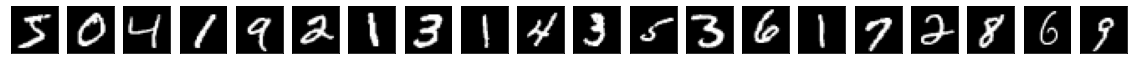

In [70]:
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [71]:
# print(len(y_train[np.where(y_train==0)]))
# print(y_train[0,15])

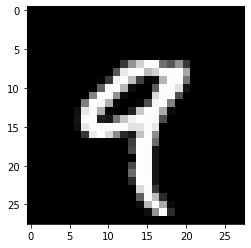

In [72]:
XX_train = x_train.astype('float32') / 255.
XX_test = x_test.astype('float32') / 255.
plt.imshow(XX_train[4].reshape(28,28))

In [73]:
Y_train, Y_test = np.zeros((y_train.shape[0], 10)), np.zeros((y_test.shape[0], 10))
for i in range(len(y_train)):
  Y_train[i, y_train[i]] = 1;

for k in range(len(y_test)):
  Y_test[k, y_test[k]] = 1;

In [74]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [75]:
print(XX_test.shape)

(784, 10000)


In [76]:
def initialize_param(d):
    np.random.seed(1)
    params = {}
    params['w'] = np.random.randn(10,d)/ np.sqrt(d)# *0.01
    params['b'] = np.zeros((10, 1))
    return params

In [77]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=0, keepdims=True)

In [78]:
def forward(parameters, X):
    w = parameters['w']
    b = parameters['b']
    Z = np.dot(w,X) + b
    A = softmax(Z)
    return A

In [79]:
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-9))#add epsilon so it wont get zero
    return cost

In [80]:
def backprop(X,Y,A):
  m = Y.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y).T)
  db = (1 / m) * np.sum(A - Y)

  return dw, db

In [81]:
def optimize(params, X, Y, num_iterations, l_rate):

#   w = params["w"]
#   b = params["b"]

  costs = []
  for i in range(num_iterations):
    A = forward(params, X)
    cost = compute_cost(A, Y)
    dw, db = backprop(X, Y, A)

    params["w"] = params["w"] - l_rate * dw.T 
    params["b"] = params["b"] - l_rate * db.T
    if (i%100==0):
      print("Cost on {} iteration: Cost: {}, Normalised Weight: {}, Bias: {}".format(i,cost,np.linalg.norm(dw),db))

    costs.append(cost)
  return params,costs


In [82]:
def predict(parameters, X, Y):
    w = parameters['w']
    print(w.shape,X.shape)
    probs = forward(parameters,X)
    y_hat = np.argmax(probs, axis=0)
    Y = np.argmax(Y, axis=0)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [83]:
def model(d, X_train, Y_train,  num_iter, l_rate):
  params = initialize_param(d)
  print(params["w"].shape,"pshape")
  params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
  # Y_hat_train = predict(params,XX_train, Y_train)
  # Y_hat_test = predict(params,XX_test, Y_test)
  
  # print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
  # print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
  return params,costs



In [84]:
params,costs = model(XX_train.shape[0], XX_train, Y_train, 1000, 0.4)

(10, 784) pshape
Cost on 0 iteration: Cost: 2.4009700231956943, Normalised Weight: 1.1287216477550395, Bias: -8.038014698286134e-18
Cost on 100 iteration: Cost: 0.41595583477518366, Normalised Weight: 0.04705525058951588, Bias: 1.3026616822268504e-18
Cost on 200 iteration: Cost: 0.36485303399927854, Normalised Weight: 0.027532990621761823, Bias: 1.1842378929335004e-19
Cost on 300 iteration: Cost: 0.3426264920997527, Normalised Weight: 0.020266585774304124, Bias: 1.7763568394002505e-19
Cost on 400 iteration: Cost: 0.3294002250360403, Normalised Weight: 0.01634471197275829, Bias: -6.513308411134252e-19
Cost on 500 iteration: Cost: 0.32035335363054307, Normalised Weight: 0.013850531891099823, Bias: 7.697546304067753e-19
Cost on 600 iteration: Cost: 0.3136479056257343, Normalised Weight: 0.012109873293264272, Bias: 1.1842378929335004e-19
Cost on 700 iteration: Cost: 0.30840855630776925, Normalised Weight: 0.010820014897243624, Bias: -2.161234154603638e-18
Cost on 800 iteration: Cost: 0.304

In [88]:
print("Train Accuracy: ",predict(params, XX_train, Y_train))
print("Test Accuracy: ",predict(params, XX_test, Y_test))



(10, 784) (784, 60000)
Train Accuracy:  91.72833333333334
(10, 784) (784, 10000)
Test Accuracy:  91.88


In [89]:
print(params['w'].shape)
print(params['b'].shape)

(10, 784)
(10, 1)


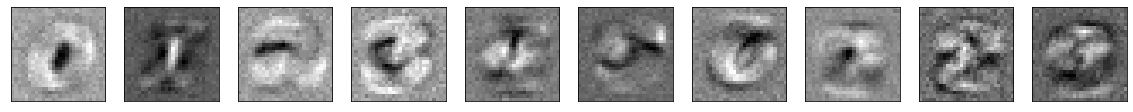

In [90]:
#image of w
n = 10
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(params['w'][i,:].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()